# Phase 2 : Exploring Data

## Import libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('./Data/raw_data/AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# Question 1: 
How many rows and how many columns?

In [6]:
print(f'The number of rows : {df.shape[0]}')
print(f'The number of columns : {df.shape[1]}')

The number of rows : 48895
The number of columns : 16


# Question 2: 
What is the meaning of each row?

- Each row is the infomation of each listing

# Question 3: 
Are there duplicated rows?

In [7]:
print(df.duplicated().sum())

0


# Question 4: 
What is the meaning of each column?

| Column name     | Meaning |
| :---        |    :----:   |
| id      | ID of the listing      |
| name   | The name of the listing        |
| host_id      | ID of the host      |
| host_name   | Name of the host        |
| neighbourhood_group      | The group of neighbourhood area around the listing       |
| neighbourhood   | The neighbourhood area around the listing          |
| latitude      | The latitude of place of listing (from the World Geodetic System(WGS84))       |
| longitude   |  The longtitude of place of listing (from the World Geodetic System(WGS84))       |
| room_type   | The type of room        |
| price      | The price of listing      |
| minimum_nights      | The minimum nights to order        |
| number_of_reviews   | The number of reviews for this listing        |
| last_review      | The date of latest reviews for this listing       |
| reviews_per_month   | The average number of reviews for this listing per month    |
| calculated_host_listings_count   | The number of listings the host has in the curent scrape       |
| availability_365   | The availability of the listing 365 days in the future as determined by the calendar       |


# Question 5: 
What is the current data type of each column? Are there columns having inappropriate data types?

In [8]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

Finding the true data type of each column

In [9]:
def open_object_col(col):
    return (set(col.apply(type)))

In [10]:
df.apply(open_object_col)

id                                                 {<class 'int'>}
name                              {<class 'str'>, <class 'float'>}
host_id                                            {<class 'int'>}
host_name                         {<class 'str'>, <class 'float'>}
neighbourhood_group                                {<class 'str'>}
neighbourhood                                      {<class 'str'>}
latitude                                         {<class 'float'>}
longitude                                        {<class 'float'>}
room_type                                          {<class 'str'>}
price                                              {<class 'int'>}
minimum_nights                                     {<class 'int'>}
number_of_reviews                                  {<class 'int'>}
last_review                       {<class 'str'>, <class 'float'>}
reviews_per_month                                {<class 'float'>}
calculated_host_listings_count                     {<class 'in

- Column id, host_id, neighbourhood_group, neighbourhood, latitude,longtitude, room_type, price, minimum_nights, number_of_reviews,review_per_month, calculated_host_listings_count and availability_365 have a right data type.
- Column name, host_name need to convert into string
- Column last_review need to convert into datetime

In [11]:
df[['name', 'host_name']] = df[['name', 'host_name']].replace(to_replace=np.nan, value='')
df['last_review'] = pd.to_datetime(df['last_review'],format='%Y-%m-%d')

In [12]:
df.apply(open_object_col)

id                                                                  {<class 'int'>}
name                                                                {<class 'str'>}
host_id                                                             {<class 'int'>}
host_name                                                           {<class 'str'>}
neighbourhood_group                                                 {<class 'str'>}
neighbourhood                                                       {<class 'str'>}
latitude                                                          {<class 'float'>}
longitude                                                         {<class 'float'>}
room_type                                                           {<class 'str'>}
price                                                               {<class 'int'>}
minimum_nights                                                      {<class 'int'>}
number_of_reviews                                                   {<class 

# Question 6: 
With each numerical column, how are values distributed?
- What is the percentage of missing values?
- Min? max? Are they abnormal?

In [13]:
numerical_col = ['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']

In [14]:
def missing_percentile(col):
    return col.isnull().sum()/len(col)

In [15]:
df[numerical_col].apply(missing_percentile)

price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
reviews_per_month                 0.205583
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

In [16]:
df[numerical_col].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


- Most of numerical columns such as price, minumun_nights, number_of_reviews, calculated_host_listings_count, availability_365 don't have missing data
- The percentage of missing values of reviews_per_month is approximately 20%. The reason for this is that there are many months the listings don't have any reviews.
- Solution for missing values of reviews_per_month is filling missing data with 0

In [17]:
df['reviews_per_month'].fillna(0,inplace=True)

In [18]:
def plot_num_data(df, columns):
    for col in columns:
        plt.figure(figsize =(5, 10))
        plt.boxplot(df[col])
        plt.title(col)
        plt.show()

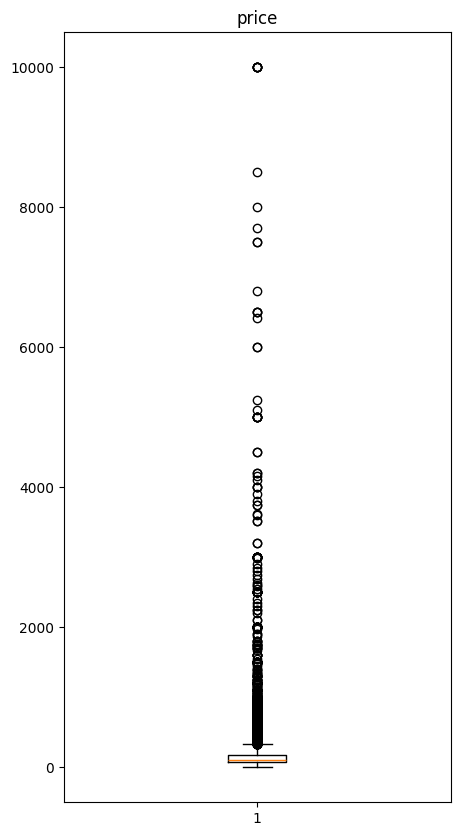

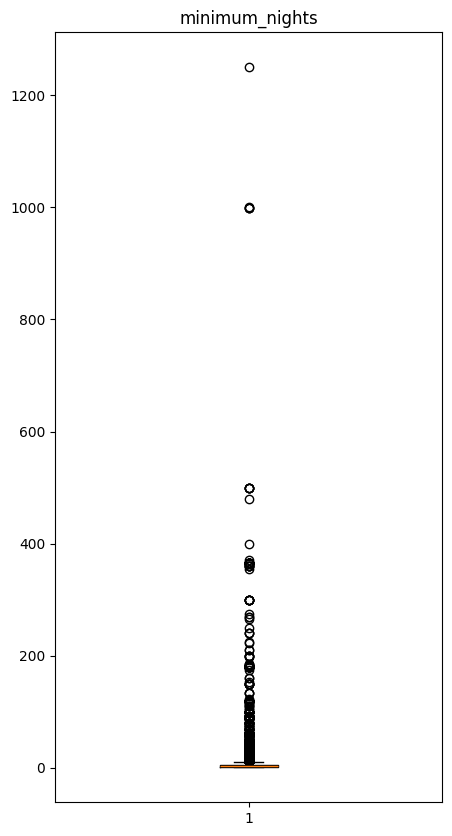

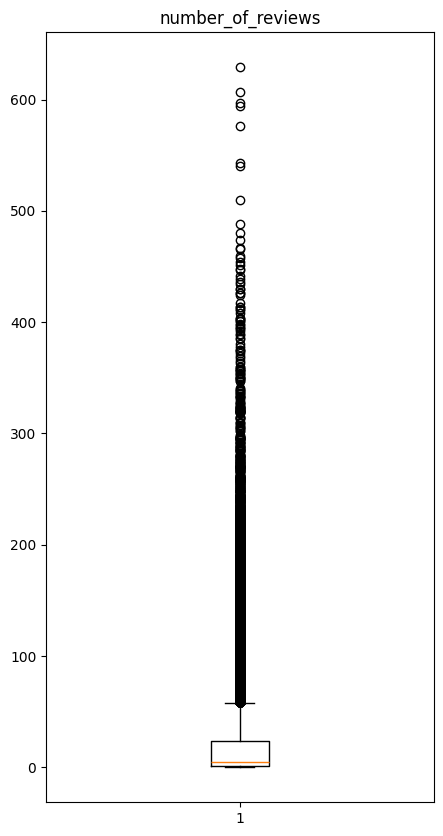

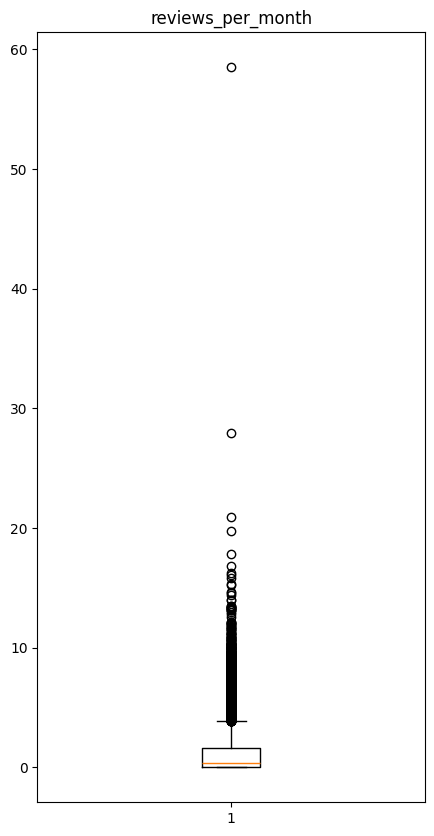

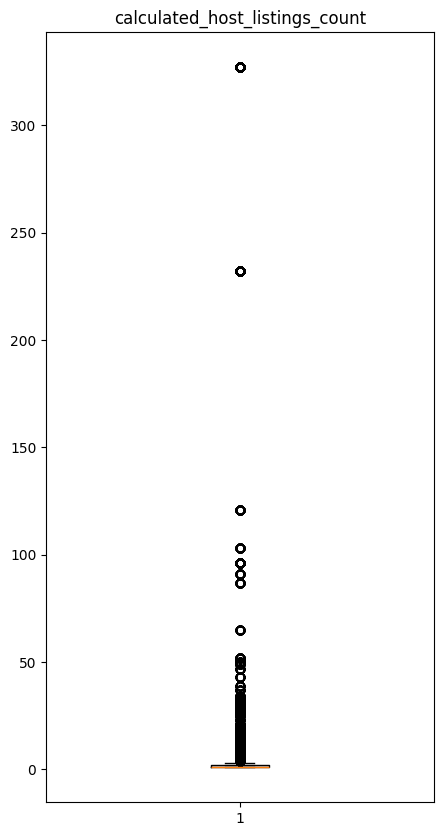

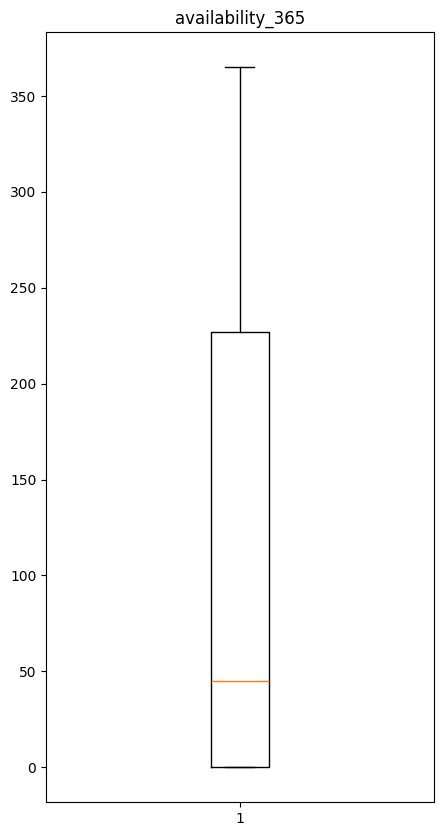

In [19]:
plot_num_data(df,numerical_col)

In [20]:
def count_outliers(df, numerical_col):
    outlier_counts = {}
    for col in numerical_col:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))
        outlier_counts[col] = outliers.sum()
    return outlier_counts

In [21]:
outliers = count_outliers(df, numerical_col)
for col, count in outliers.items():
    print(f"The number of outliers of {col}: {count}")
    print(f'The percentage of outliers of {col} : {(count/ len(df[col])).round(2)}')

The number of outliers of price: 2972
The percentage of outliers of price : 0.06
The number of outliers of minimum_nights: 6607
The percentage of outliers of minimum_nights : 0.14
The number of outliers of number_of_reviews: 6021
The percentage of outliers of number_of_reviews : 0.12
The number of outliers of reviews_per_month: 3312
The percentage of outliers of reviews_per_month : 0.07
The number of outliers of calculated_host_listings_count: 7081
The percentage of outliers of calculated_host_listings_count : 0.14
The number of outliers of availability_365: 0
The percentage of outliers of availability_365 : 0.0


# Question 7: 
With each categorical column, how are values distributed?
- What is the percentage of missing values?
- How many different values? Show a few
- Are they abnormal?

In [22]:
cate_col = ['neighbourhood_group','room_type']

Calculate the missing value of categorical data

In [23]:
df[cate_col].apply(missing_percentile)

neighbourhood_group    0.0
room_type              0.0
dtype: float64

Show the distinct value of data

In [24]:
for col in cate_col:
    print(df[col].value_counts())

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64
room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64


In [25]:
def plot_cate_data(df,cate_col):
    for col in cate_col:
        category_counts = df[col].value_counts()

        sns.barplot(x=category_counts.index, y=category_counts.values)
        
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right') 

        plt.show()

c:\Users\ADMIN\anaconda3\envs\min_ds-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ADMIN\anaconda3\envs\min_ds-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ADMIN\anaconda3\envs\min_ds-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


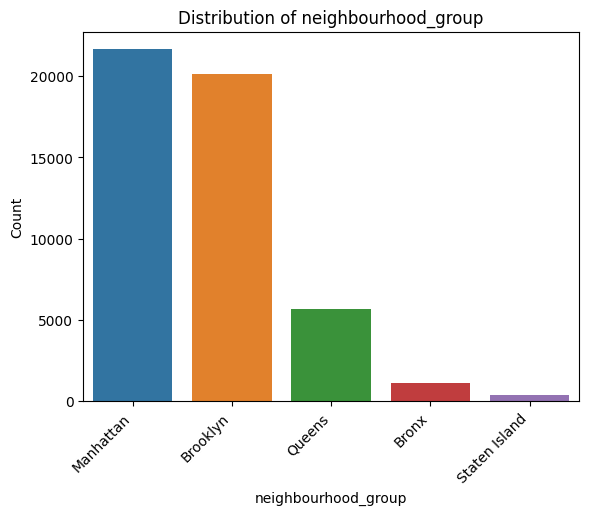

c:\Users\ADMIN\anaconda3\envs\min_ds-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ADMIN\anaconda3\envs\min_ds-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ADMIN\anaconda3\envs\min_ds-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


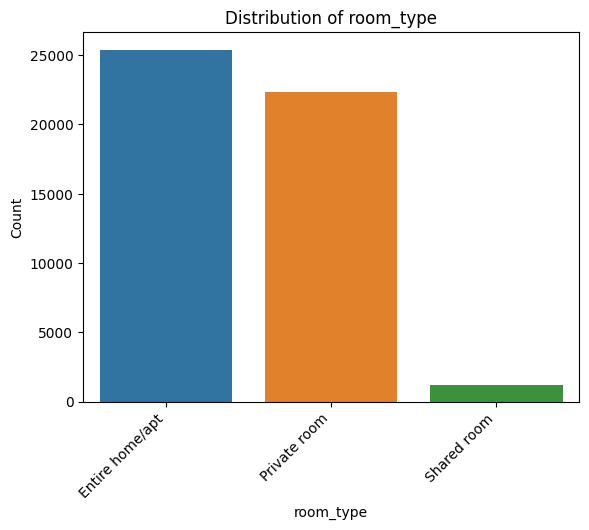

In [26]:
plot_cate_data(df,cate_col)

## Save to csv file

In [27]:
df.to_csv('./Data/processed_data/processed_data.csv',index=False)